<a href="https://colab.research.google.com/github/nearj/UOS_2019_crime_graph_analysis/blob/master/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving reduced_for_clustering.csv to reduced_for_clustering (2).csv


In [0]:
import io

In [0]:
from sklearn.cluster import KMeans
from sklearn import decomposition
from yellowbrick.cluster import KElbowVisualizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv(io.BytesIO(uploaded['reduced_for_clustering.csv']))
data_set = df.drop(columns=['Unnamed: 0', 'index'])
data_set

,0,1,2,3,4
PD_CD,101,101,101,101,101
LAW_CAT_CD,1,1,1,1,1
LOC_OF_OCCUR_DESC,1,1,1,1,1
PREM_TYP_DESC,60,42,51,51,33
SUSP_AGE_GROUP,1,0,1,1,1
SUSP_RACE,6,2,1,2,2
SUSP_SEX,0,0,1,1,1
VIC_AGE_GROUP,0,1,0,2,1
VIC_RACE,6,6,1,2,2
VIC_SEX,0,1,1,0,0


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f04e815bef0>,
                 k=None, metric=None, model=None, timings=True)

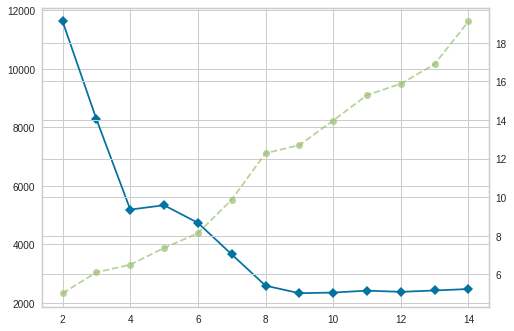

In [0]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(data_set)

array([[-0.63139432, -1.84146326, -0.59592223],
       [ 0.49469938, -0.85206109,  0.5243874 ],
       [ 2.2328163 ,  0.49813929, -0.28459715],
       ...,
       [-2.27822588, -0.52743951,  0.92734301],
       [ 0.25959594,  1.72894567, -0.09721183],
       [-1.12062767,  0.38993878,  0.59009861]])

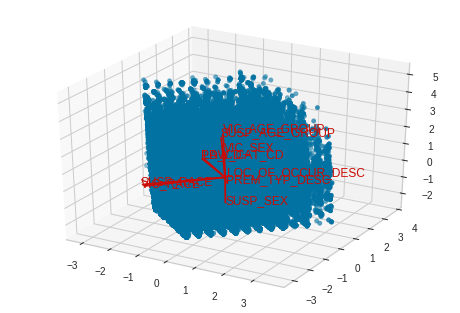

In [0]:
from yellowbrick.features.pca import PCADecomposition
visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=3)
visualizer.fit_transform(data_set)

array([[-0.63139432, -1.84146326],
       [ 0.49469938, -0.85206109],
       [ 2.2328163 ,  0.49813929],
       ...,
       [-2.27822588, -0.52743951],
       [ 0.25959594,  1.72894567],
       [-1.12062767,  0.38993878]])

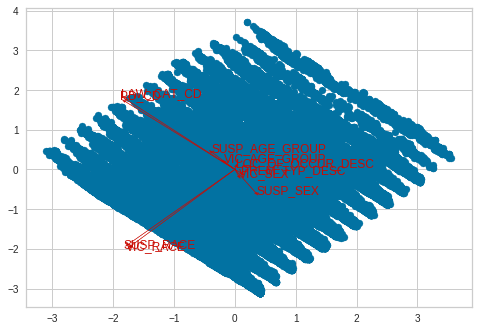

In [0]:
visualizer = PCADecomposition(scale=True, proj_features=True)
visualizer.fit_transform(data_set)

In [0]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(data_set)

In [0]:
pca = decomposition.PCA(n_components=4)
pca.fit(data_set)
X = pca.transform(data_set)

In [0]:
df2 = pd.DataFrame()

In [0]:
df['pca-one'] = X[:,0]
df['pca-two'] = X[:,1]
df['pca-three'] = X[:,2]
df['pca-four'] = X[:,3]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.98386648e-01 1.45649351e-03 9.06795913e-05 2.01584690e-05]


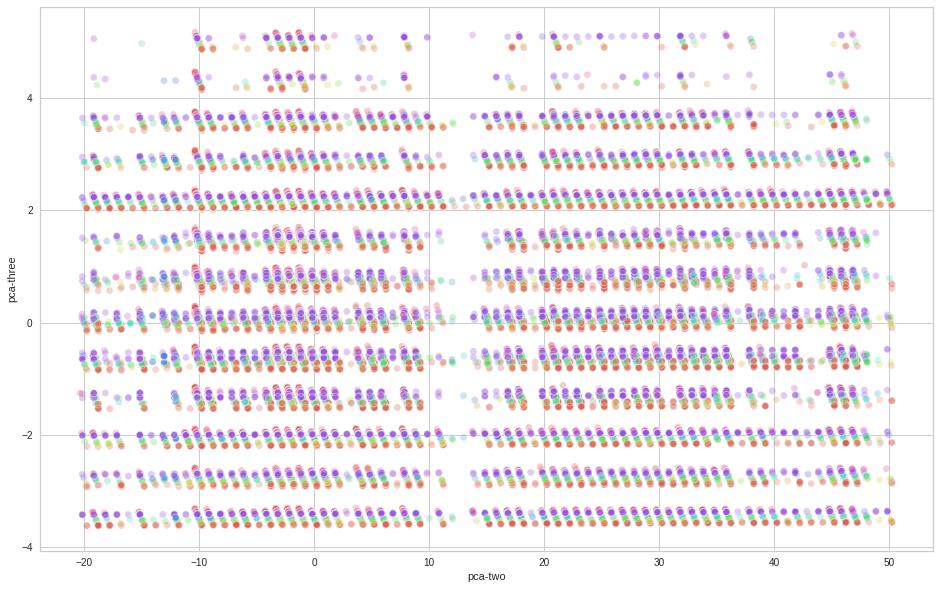

In [0]:
plt.figure(figsize=(16,10))

sns.scatterplot(x="pca-two", y='pca-three', hue="PD_CD", palette=sns.color_palette("hls", 322), data=df.loc[np.random.permutation(df.shape[0]),:], legend=False, alpha=0.3)

In [0]:
adjusted_df = df.drop(columns=['Unnamed: 0', 'index'])
adjusted_df['PD_CD'] /= 100
adjusted_df

,PD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,1.01,1,1,60,1,6,0,0,6,0
1,1.01,1,1,42,0,2,0,1,6,1
2,1.01,1,1,51,1,1,1,0,1,1
3,1.01,1,1,51,1,2,1,2,2,0
4,1.01,1,1,33,1,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
916963,9.22,1,0,60,1,3,1,2,3,1
916964,9.22,1,0,60,0,6,1,3,5,1
916965,9.22,1,0,60,1,6,1,4,6,0
916966,9.22,1,0,60,1,2,1,1,1,1


array([[-0.63139432, -1.84146326, -0.59592223],
       [ 0.49469938, -0.85206109,  0.5243874 ],
       [ 2.2328163 ,  0.49813929, -0.28459715],
       ...,
       [-2.27822588, -0.52743951,  0.92734301],
       [ 0.25959594,  1.72894567, -0.09721183],
       [-1.12062767,  0.38993878,  0.59009861]])

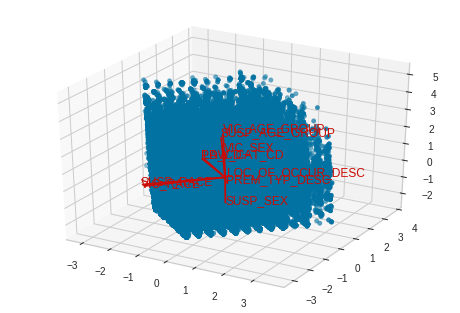

In [0]:
visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=3)
visualizer.fit_transform(adjusted_df)

In [0]:
X_batch = adjusted_df.sample(n=100000)
print(X_batch)

        PD_CD  LAW_CAT_CD  LOC_OF_OCCUR_DESC  ...  VIC_AGE_GROUP  VIC_RACE  VIC_SEX
269427   1.75           1                  1  ...              4         2        0
549318   6.37           2                  1  ...              2         2        0
838041   6.39           1                  1  ...              0         6        0
245579   1.14           1                  1  ...              0         1        0
12580    1.01           1                  1  ...              2         3        0
...       ...         ...                ...  ...            ...       ...      ...
640835   6.38           2                  1  ...              1         6        0
297475   1.98           0                  1  ...              1         2        0
530268   6.37           2                  1  ...              1         2        0
236607   1.13           1                  1  ...              1         2        0
49578    1.01           1                  0  ...              1         6  

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f04a254cba8>,
                 k=None, metric=None, model=None, timings=True)

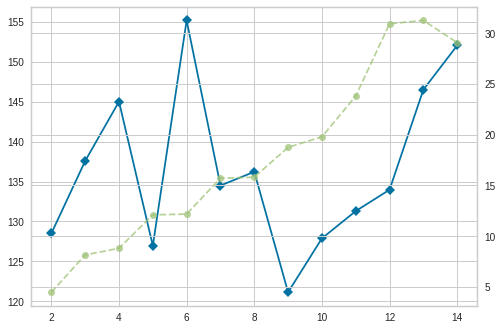

In [0]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(adjusted_df)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f04a2617c18>,
                 k=None, metric=None, model=None, timings=True)

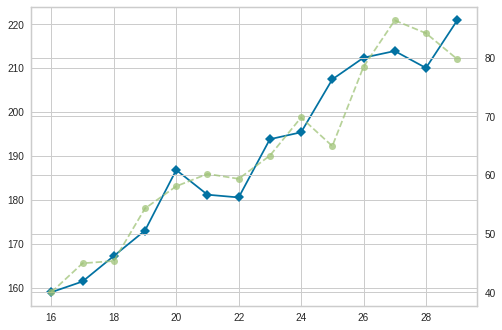

In [0]:
visualizer = KElbowVisualizer(model, k=(16,30))
visualizer.fit(adjusted_df)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f04a2458eb8>,
                 k=None, metric=None, model=None, timings=True)

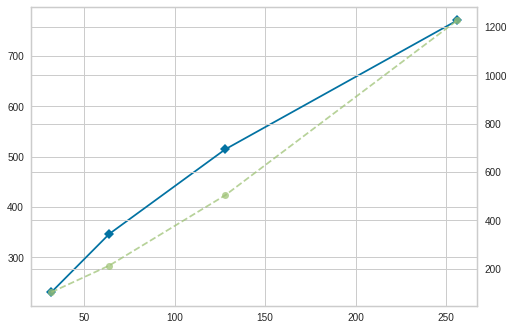

In [0]:
visualizer = KElbowVisualizer(model, k=[32,64,128,256])
visualizer.fit(adjusted_df)

array([[ 13.636569 , -22.627964 ],
       [ 11.508243 , -18.365824 ],
       [ 21.822803 , -12.348135 ],
       ...,
       [-53.80751  ,  10.023371 ],
       [-10.723222 , -68.79304  ],
       [-15.233128 ,  -3.9319131]], dtype=float32)

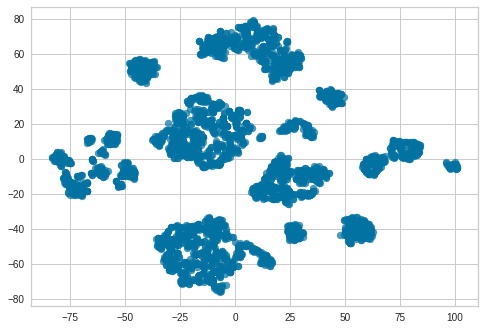

In [0]:
from yellowbrick.features import Manifold
viz = Manifold(manifold="tsne")
viz.fit_transform(adjusted_df.sample(n=4000))

array([[ -198835.9  ,   449081.53 ],
       [-2158270.8  ,   500690.22 ],
       [ -607742.1  ,  -177164.64 ],
       ...,
       [-2432353.5  ,  -373629.7  ],
       [-2202703.5  ,  -369611.66 ],
       [   46977.742,  -356575.25 ]], dtype=float32)

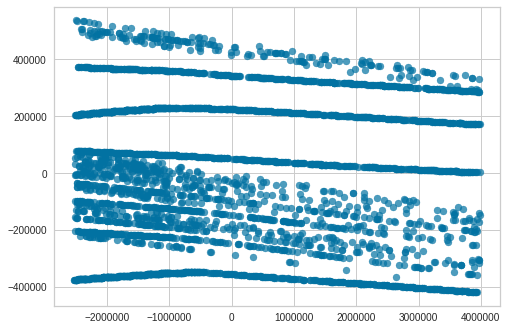

In [0]:
viz = Manifold(manifold="tsne")
viz.fit_transform(df.sample(n=4000))

array([[-0.63139432, -1.84146326, -0.59592223],
       [ 0.49469938, -0.85206109,  0.5243874 ],
       [ 2.2328163 ,  0.49813929, -0.28459715],
       ...,
       [-2.27822588, -0.52743951,  0.92734301],
       [ 0.25959594,  1.72894567, -0.09721183],
       [-1.12062767,  0.38993878,  0.59009861]])

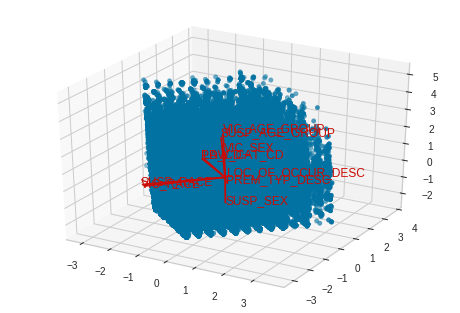

In [0]:
visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=3)
visualizer.fit_transform(data_set[(data_set.PD_CD >= 500) & (data_set.PD_CD <= 569)])

array([[-0.42915759, -2.17808839, -0.4783745 ],
       [ 0.86815895, -1.42765322, -1.04323435],
       [-0.55266485, -2.05493613,  0.09882035],
       ...,
       [-2.02285892, -1.05694995, -1.55675876],
       [ 0.1709476 ,  1.15368868, -1.66774374],
       [-2.07716828, -0.80401714, -1.74523766]])

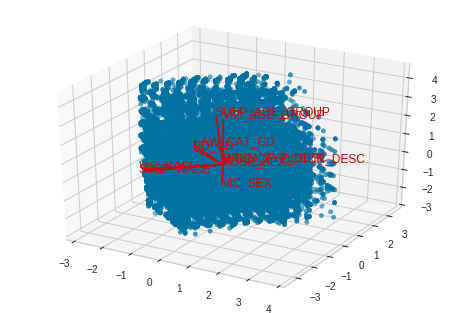

In [0]:
visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=3)
visualizer.fit_transform(data_set[data_set.SUSP_SEX == 0])

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f40edaa77b8>,
                 k=None, metric=None, model=None, timings=True)

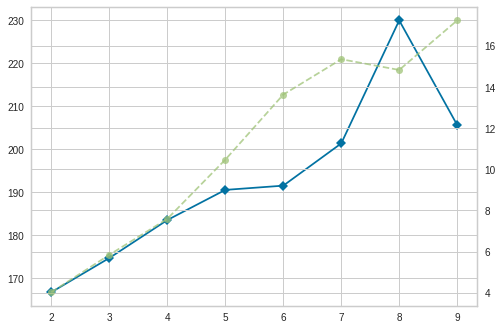

In [0]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=([11,13,15]))
visualizer.fit(adjusted_df)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f40ed958c18>,
                 k=None, metric=None, model=None, timings=True)

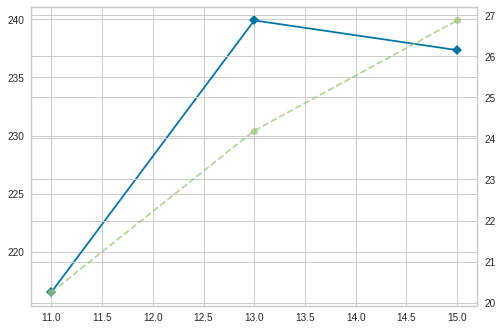

In [0]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=([11,13,15]))
visualizer.fit(adjusted_df)

In [0]:
adjusted_df.SUSP_SEX /= 10

In [0]:
from kmodes import kmodes

km = kmodes.KModes(n_clusters=4, init='Huang')
clusters = km.fit_predict(adjusted_df)

In [0]:
clusters.shape

(916968,)

ValueError: ignored

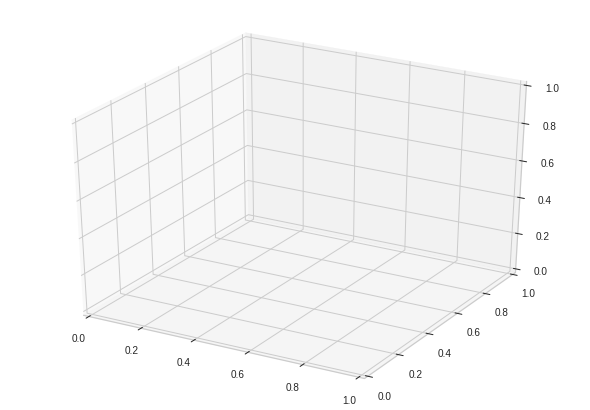

In [0]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
color = ["g", "r", "b", "c"]

pca = PCA(3)
plot_columns = pca.fit_transform(adjusted_df)
ax.scatter(xs=plot_columns[:10000,2], ys=plot_columns[:10000,1], zs=plot_columns[:10000,0],c = [for x in clusters], s=10)